## Experiment 2 - Principal Component Analysis 
## Nikita Chitre
## Roll No 4
## Batch A

Objective: To implement and use Principal Component Analysis using Python Platform.

*  In this notebook we will use Red Wine quality dataset from UCI to predict wine qualiy score.
*  We will find perform data cleaning by handling missing values and outliers.
*  We will then visualize the data and understand some relationships.
*  Then we will use Principal Component Analysis (PCA) to calculate a projection of a dataset and select a number of dimensions or principal components of the projection to use as input to a model.
*  Laslty, we will train a linear regression model and evaluate the results. 

Attribute Information:

    Input variables (based on physicochemical tests):
    1. fixed acidity
    2. volatile acidity
    3. citric acid
    4. residual sugar
    5. chlorides
    6. free sulfur dioxide
    7. total sulfur dioxide
    8. density
    9. pH
    10. sulphates
    11. alcohol
    
    Output variable (based on sensory data):
    12. quality (score between 0 and 10)


In [1]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Reading Data from CSV file

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
                 sep=';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Data Preprocessing 

## Data Cleaning

### Step 1: Removing duplicate rows

Create a copy of Dataset

In [4]:
df_clean = df.copy()

In [5]:
df_clean.shape

(1599, 12)

We see that our dataset has 12 columns and 1599 rows. 

Next lst's check if there are duplicated rows

In [6]:
df_clean.duplicated().sum()

240

There are 240 duplicate rows which have to be removed. 

#Removing all the duplicated records

In [7]:
df_clean.drop_duplicates(inplace=True)

We have removed the duplicate rows. Let's crosscheck it by printing the no. of duplicate.

In [8]:
df_clean.duplicated().sum()

0

We see that now the data has zero duplicate records. 

Now that we have removed duplicate, we can handle missing values.

### Handling Missing values

In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [10]:
df_clean.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We can see that there are no missing values in the dataset

### Outlier Detection

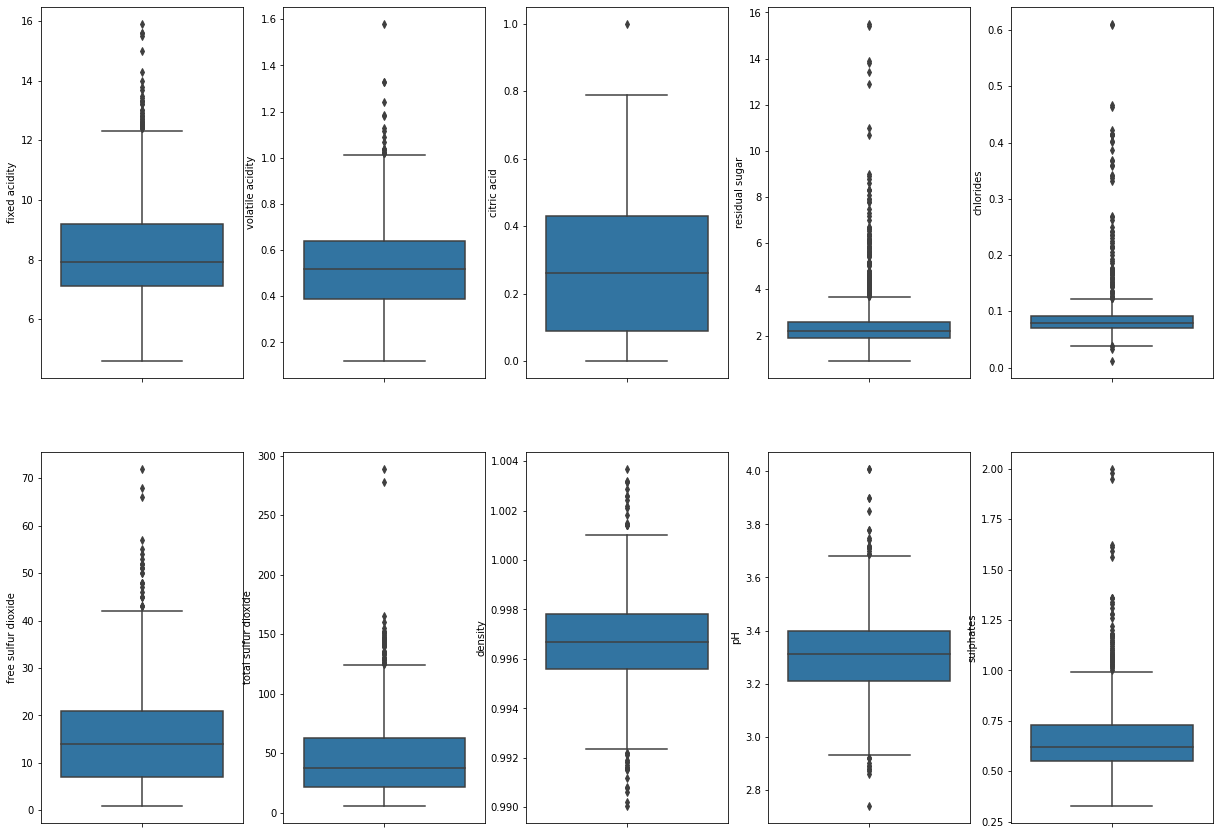

In [11]:
f, axes = plt.subplots(2, 5, figsize=(21,15))
g = sns.boxplot(data=df_clean, y='fixed acidity', ax=axes[0,0])
g = sns.boxplot(data=df_clean, y='volatile acidity', ax=axes[0,1])
g = sns.boxplot(data=df_clean, y='citric acid', ax=axes[0,2])
g = sns.boxplot(data=df_clean, y='residual sugar', ax=axes[0,3])
g = sns.boxplot(data=df_clean, y='chlorides', ax=axes[0,4])
g = sns.boxplot(data=df_clean, y='free sulfur dioxide', ax=axes[1,0])
g = sns.boxplot(data=df_clean, y='total sulfur dioxide', ax=axes[1,1])
g = sns.boxplot(data=df_clean, y='density', ax=axes[1,2])
g = sns.boxplot(data=df_clean, y='pH', ax=axes[1,3])
g = sns.boxplot(data=df_clean, y='sulphates', ax=axes[1,4])

From the box plot we can see that all the columns have outliers. 

#### Replacing the outliers by Lower and Upper Limit

In [12]:
for variable in ['fixed acidity','volatile acidity', 'citric acid','density', 
                  'residual sugar', 'chlorides', 'free sulfur dioxide',
                  'total sulfur dioxide','sulphates', 'pH',              
                  'alcohol']: 

    Q1 = df_clean[variable].quantile(0.25)
    Q3 = df_clean[variable].quantile(0.75)
    IQR = Q3 - Q1
    up_limit = Q3+1.5*IQR
    low_limit = Q1-1.5*IQR

    df_clean.loc[(df_clean[variable] < low_limit), variable] = low_limit
    df_clean.loc[(df_clean[variable] > up_limit), variable] = up_limit

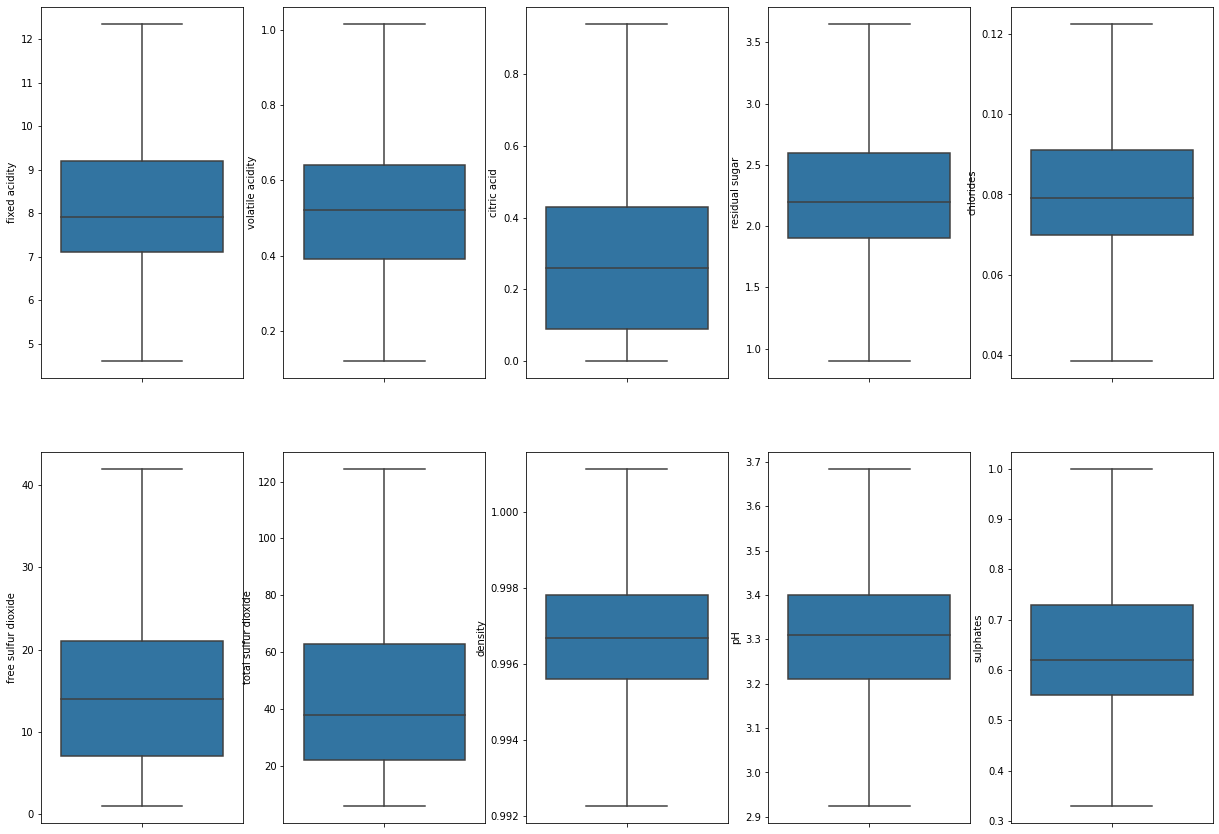

In [13]:
f, axes = plt.subplots(2, 5, figsize=(21,15))
g = sns.boxplot(data=df_clean, y='fixed acidity', ax=axes[0,0])
g = sns.boxplot(data=df_clean, y='volatile acidity', ax=axes[0,1])
g = sns.boxplot(data=df_clean, y='citric acid', ax=axes[0,2])
g = sns.boxplot(data=df_clean, y='residual sugar', ax=axes[0,3])
g = sns.boxplot(data=df_clean, y='chlorides', ax=axes[0,4])
g = sns.boxplot(data=df_clean, y='free sulfur dioxide', ax=axes[1,0])
g = sns.boxplot(data=df_clean, y='total sulfur dioxide', ax=axes[1,1])
g = sns.boxplot(data=df_clean, y='density', ax=axes[1,2])
g = sns.boxplot(data=df_clean, y='pH', ax=axes[1,3])
g = sns.boxplot(data=df_clean, y='sulphates', ax=axes[1,4])

Now we can see from the above boxplots that all outliers have been handled

### Data Reduction

Next, let's see if we can reduce the data by dropping uncorrelated columns.

#### Correlation of variables

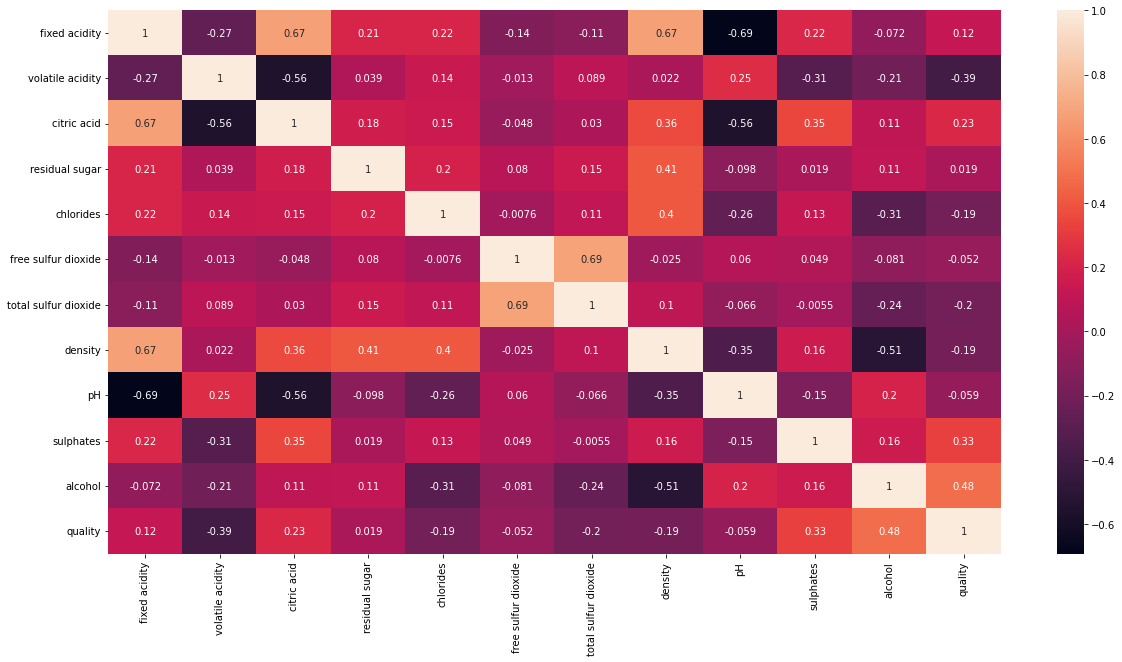

In [14]:
fig = plt.figure(figsize =(20, 10))

_ = sns.heatmap(df_clean.corr(), annot = True) 

From the Heatmap, we can see that Density and pH have very low correlation with output variable quality. Hence we can drop them. 

In [15]:
df_clean = df_clean.drop(['density', 'pH'],axis=1)

## Data Visualization

### Relation between Quality and Fixed Acidity

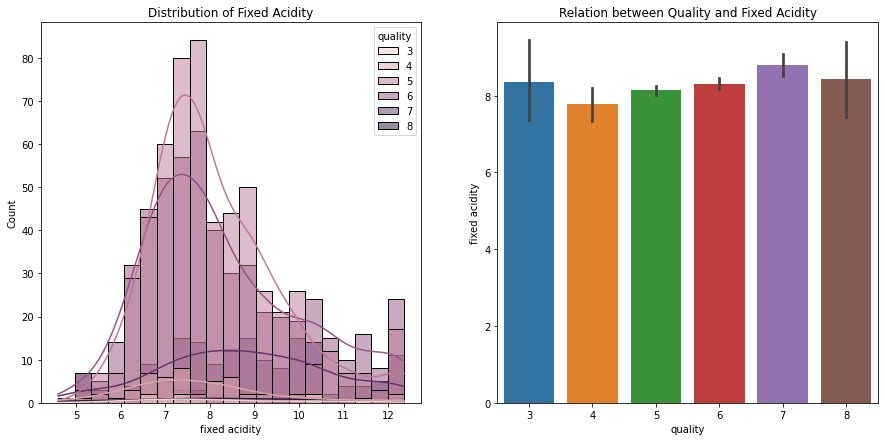

In [16]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
axes[0].set_title('Distribution of Fixed Acidity')
_ = sns.histplot(data = df_clean, x = 'fixed acidity', hue = 'quality',kde=True, ax=axes[0])   
sns.barplot(x = 'quality', y = 'fixed acidity', data = df_clean)
_ = axes[1].set_title('Relation between Quality and Fixed Acidity')

*   The first graph shows the distribution of fixed acidity with respect to quality score. 
*   The second graph shows the mean value of fixed acidity for each quality score.
*    We can notice that the mean value is almost the same for each quality score. 
*    Also, the distribution graph does not show much correlation between fixed acidity and quality column. 


### Relation between Quality and Volatile acidity

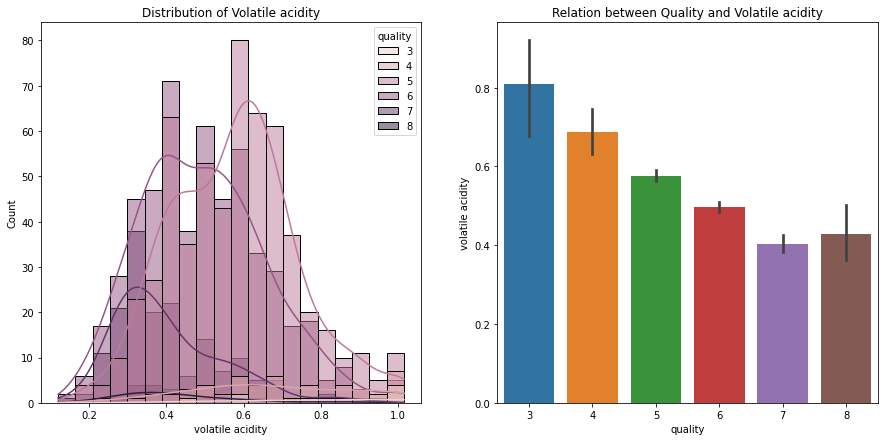

In [17]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
axes[0].set_title('Distribution of Volatile acidity')
_ = sns.histplot(data = df_clean, x = 'volatile acidity', hue = 'quality',kde=True, ax=axes[0])   
sns.barplot(x = 'quality', y = 'volatile acidity', data = df_clean)
_ = axes[1].set_title('Relation between Quality and Volatile acidity')


From the above graphs we can see that as the quality increases, volatile acidity decreases. 

*   The first graph shows the distribution of volatile acidity with respect to quality score. 
*   The second graph shows the mean value of volatile acidity for each quality score.
*    We can notice that the mean value of volatile acidity decreases as quality score increases. 


### Relation between Quality and Citric acid

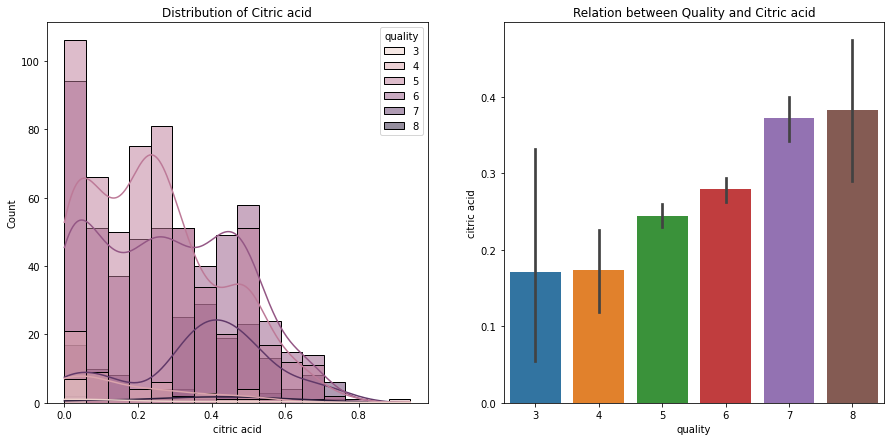

In [18]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
axes[0].set_title('Distribution of Citric acid')
_ = sns.histplot(data = df_clean, x = 'citric acid', hue = 'quality',kde=True, ax=axes[0])   
sns.barplot(x = 'quality', y = 'citric acid', data = df_clean)
_ = axes[1].set_title('Relation between Quality and Citric acid')




*   The first graph shows the distribution of citric acid with respect to quality score. 
*   The second graph shows the mean value of citric acid for each quality score.
*    We can see that the composition of citric acid goes higher as we go higher in the quality of the wine.

### Relation between Quality and Residual sugar

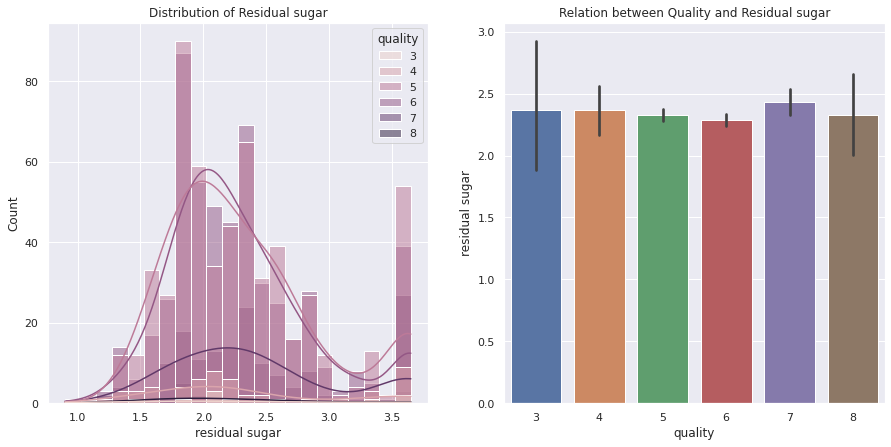

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
axes[0].set_title('Distribution of Residual sugar')
_ = sns.histplot(data = df_clean, x = 'residual sugar', hue = 'quality',kde=True, ax=axes[0])   
sns.barplot(x = 'quality', y = 'residual sugar', data = df_clean)
_ = axes[1].set_title('Relation between Quality and Residual sugar')

*   The first graph shows the distribution of residual sugar with respect to quality score. 
*   The second graph shows the mean value of residual sugar for each quality score.
*    We can notice that the mean value of residual sugar is almost the same for each quality score. 
*    Also, the distribution graph does not show much correlation between residual sugar and quality column.

### Relation between Quality and Chlorides

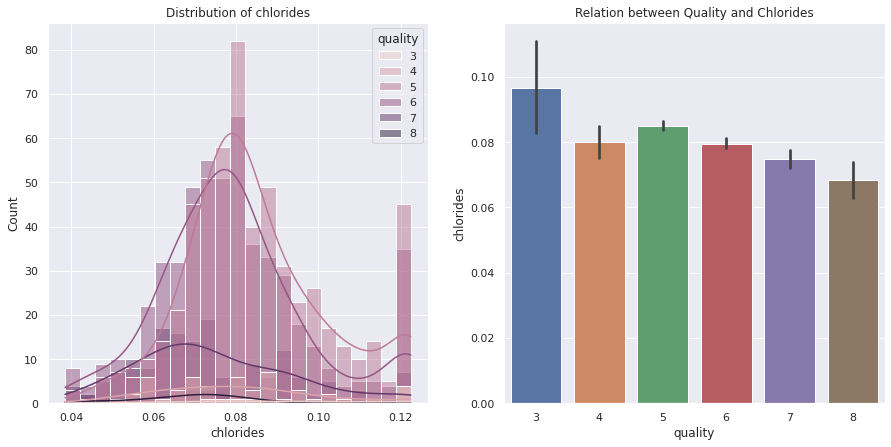

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
axes[0].set_title('Distribution of chlorides')
_ = sns.histplot(data = df_clean, x = 'chlorides', hue = 'quality',kde=True, ax=axes[0])   
sns.barplot(x = 'quality', y = 'chlorides', data = df_clean)
_ = axes[1].set_title('Relation between Quality and Chlorides')


*   The first graph shows the distribution of chlorides with respect to quality score. 
*   The second graph shows the mean value of chlorides for each quality score.
*    We can see that the composition of chlorides goes fairly down as we go higher in the quality of the wine.

### Relation between Quality and Sulphates

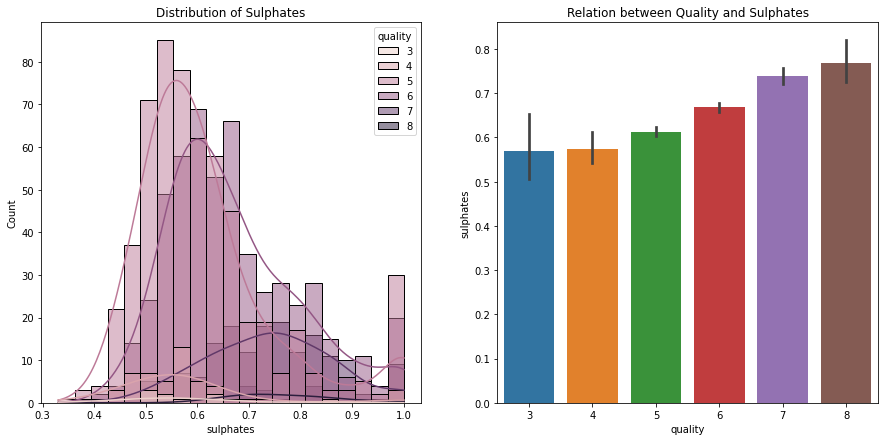

In [19]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
axes[0].set_title('Distribution of Sulphates')
_ = sns.histplot(data = df_clean, x = 'sulphates', hue = 'quality',kde=True, ax=axes[0])   
sns.barplot(x = 'quality', y = 'sulphates', data = df_clean)
_ = axes[1].set_title('Relation between Quality and Sulphates')

*   The first graph shows the distribution of sulphates with respect to quality score. 
*   The second graph shows the mean value of sulphates for each quality score.
*    We can see that the sulphate level goes higher as we go higher in the quality of the wine.

### Relation between Quality and Alcohol

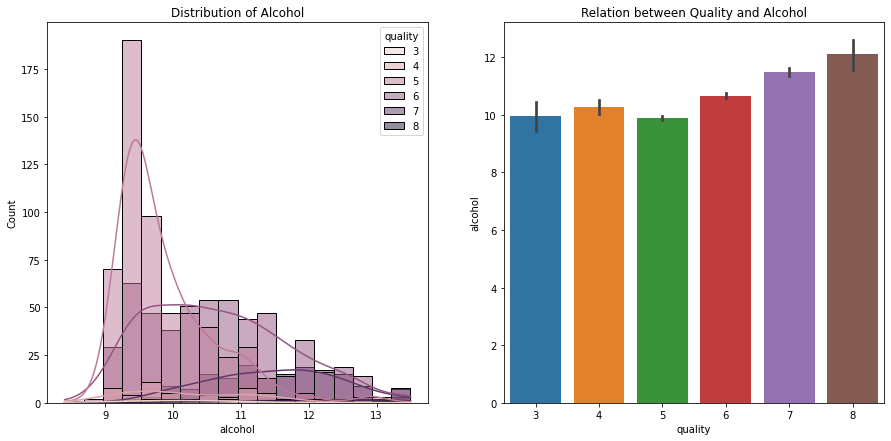

In [20]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
axes[0].set_title('Distribution of Alcohol')
_ = sns.histplot(data = df_clean, x = 'alcohol', hue = 'quality',kde=True, ax=axes[0])   
sns.barplot(x = 'quality', y = 'alcohol', data = df_clean)
_ = axes[1].set_title('Relation between Quality and Alcohol')

*   The first graph shows the distribution of alchohol level with respect to quality score. 
*   The second graph shows the mean value of alcohol for each quality score.
*    We can see that the alcohol level goes higher as we go higher in the quality of the wine.

## Data Normalization 

In [21]:
df_clean.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.56,9.4,5


*   Since all the columns in dataset are numeric, we need perform Standard Scaler to center the data to mean value 0 and standard deviation of 1.
*   Scaling causes Regression models such as linear regression to perform better.



Let's first split the data into train and test and then apply standard scaler.

### Train test split

In [22]:
#Feature Variables
X = df_clean.drop('quality',axis=1)
#Target Variable
y = df_clean['quality']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=17)

In [23]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1087, 9), (1087,), (272, 9), (272,))

There are 1087 rows in training dataset and 272 rows in testing dataset.

### Using Standard Scaler

In [24]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

In [25]:
X_train_scaled = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5,6,7,8
count,1.087000e+03,1.087000e+03,1.087000e+03,1.087000e+03,1.087000e+03,1.087000e+03,1.087000e+03,1.087000e+03,1.087000e+03
mean,7.558096e-18,3.268366e-17,9.662107e-17,1.119415e-16,-8.538861e-16,6.386080e-17,4.685509e-17,-6.495877e-17,3.530856e-16
std,1.000460e+00,1.000460e+00,1.000460e+00,1.000460e+00,1.000460e+00,1.000460e+00,1.000460e+00,1.000460e+00,1.000460e+00
min,-2.169056e+00,-2.282987e+00,-1.394067e+00,-2.322353e+00,-2.323118e+00,-1.470065e+00,-1.293096e+00,-2.314948e+00,-1.879638e+00
25%,-7.187752e-01,-7.751073e-01,-8.839512e-01,-6.999894e-01,-6.270685e-01,-8.692901e-01,-7.788615e-01,-7.154201e-01,-8.515122e-01
50%,-2.353482e-01,-4.909124e-02,-6.776521e-02,-2.132804e-01,-8.864007e-02,-2.685155e-01,-2.646272e-01,-2.064792e-01,-2.907162e-01
75%,5.804348e-01,6.210774e-01,7.994324e-01,4.356651e-01,5.574740e-01,5.325174e-01,5.388638e-01,5.569320e-01,6.439437e-01
max,2.453714e+00,2.715355e+00,3.401025e+00,2.139147e+00,2.199681e+00,2.635229e+00,2.515452e+00,2.556343e+00,2.887128e+00


From above, we can see that all columns now have mean 0 and standard deviation 1

## Implementing PCA from Scratch

*   Principal Component Analysis (PCA) is an exploratory approach to reduce the data set's dimensionality to 2D or 3D, used in exploratory data analysis for making predictive models.
*   Principal Component Analysis is a linear transformation of data set that defines a new coordinate rule such that:
    1. The highest variance by any projection of the data set appears to laze on the first axis.
    2. The second biggest variance on the second axis, and so on.



We will implement the PCA from scratch by defining the necessary functions inside Convers_pca class as follows:

In [ ]:
class convers_pca():

    def __init__(self, no_of_components):
        self.no_of_components = no_of_components
        self.eigen_values = None
        self.eigen_vectors = None
        self.explained_variance_ratio = None
        
    def transform(self, x):
        return np.dot(x - self.mean, self.projection_matrix.T)
    
    def inverse_transform(self, x):
        return np.dot(x, self.projection_matrix) + self.mean
    
    def fit(self, x):

        self.no_of_components = x.shape[1] if self.no_of_components is None else self.no_of_components
        self.mean = np.mean(x, axis=0)
        
        # covariance matrix
        cov_matrix = np.cov(x - self.mean, rowvar=False)
        
        # computing eigen values and eignen vectors
        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_matrix)

        self.eigen_vectors = self.eigen_vectors.T
        
        print('\nEigen Values')
        print(self.eigen_values)

        # sorted components
        self.sorted_components = np.argsort(self.eigen_values)[::-1]

        print('\nSorted Components')
        print(self.sorted_components)
        
        # computing variance ratio 
        self.projection_matrix = self.eigen_vectors[self.sorted_components[:self.no_of_components]]
        self.explained_variance = self.eigen_values[self.sorted_components]
        self.explained_variance_ratio = self.explained_variance / self.eigen_values.sum()

        print('\nExplained Variance ratio: ')
        print(self.explained_variance_ratio)

### Applying PCA on the dataset

Now, let's instantiate our convers_pca class and call the fit method to apply PCA on our dataset

In [ ]:
pca = convers_pca(no_of_components = None)
pca.fit(X_train_scaled)
Z = pca.transform(X_train_scaled)


Eigen Values
[2.35140214 1.83182176 1.41996633 0.18163819 0.30786934 0.47201909
 0.53465117 0.86747076 1.04144851]

Sorted Components
[0 1 2 8 7 6 5 4 3]

Explained Variance ratio: 
[0.26102655 0.20334851 0.15762889 0.11561005 0.09629697 0.05935103
 0.05239832 0.03417623 0.02016345]


Above output shows explained variance ratio for each component and the also shows the sorted components.

### Visualization PCA component variance using Scree plot

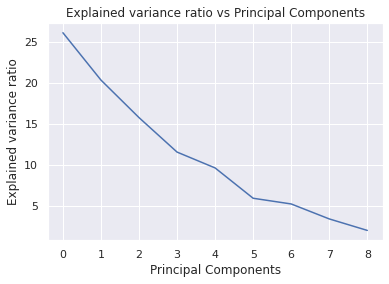

In [ ]:
sns.set()
plt.plot(pca.explained_variance_ratio*100) # scree plot
plt.title('Explained variance ratio vs Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained variance ratio')
plt.show()

*   The above plot is called Scree plot. 
*   This plot shows variances explained by each component. 
*   Ideally, we would like to see an elbow shape in order to decide which PCs to keep and which ones to disregard.
*    From the above plot, we can take first 5 components to contain most of the information inside the data.  



### Using 5 components in PCA

In [ ]:
pca = convers_pca(no_of_components = 5)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


Eigen Values
[2.35140214 1.83182176 1.41996633 0.18163819 0.30786934 0.47201909
 0.53465117 0.86747076 1.04144851]

Sorted Components
[0 1 2 8 7 6 5 4 3]

Explained Variance ratio: 
[0.26102655 0.20334851 0.15762889 0.11561005 0.09629697 0.05935103
 0.05239832 0.03417623 0.02016345]


In [ ]:
pca_df = pd.DataFrame(X_train_pca)

Transformed dataframe with 5 components

In [ ]:
pca_df.head()

,0,1,2,3,4
0,-1.373785,1.484416,-0.479211,0.111348,-0.563278
1,2.889367,0.019760,-0.718015,0.565212,0.526696
2,-0.061372,1.071148,-1.102414,-1.203188,-0.281852
3,-0.351625,-3.308247,-0.434729,-1.257401,-0.051859
4,-0.634714,-0.807522,0.021297,-0.706827,0.922154






*   From above, we can see our transformed dataframe has 5 columns i.e components.
*   Thus, we have reduced the dataset dimentionality. 



## Model Training

Now since we have completed PCA, we can train our model

In [ ]:
linearRegr = LinearRegression()   

In [ ]:
linearRegr.fit(X_train_pca, y_train)     

LinearRegression()

## Model Evaluation

In [ ]:
y_pred = linearRegr.predict(X_train_pca)
mse = mean_squared_error(y_train, y_pred)
print("Linear Regression MSE:", mse)

Linear Regression MSE: 0.44753257091676657


In [ ]:
y_pred = linearRegr.predict(X_test_pca)
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression MSE:", mse)

Linear Regression MSE: 0.3954390303478218


We can see that Linear Regression model have Mean Square Error of 0.39 on testing data. 

## Conclusion

1. The red wine quality is dependent upon it's physicochemical parameters such as volatile acidity, citric acid, sulphate level, alcohol level.
2. The wine having lower volatile acidity has higher quality.
3. The wine having higher composition of citric acid, higher sulphate level and higher alcohol level has higher quality.
4. For the red wine dataset, PCA with five components preserved most of the information in the dataset.